#<font color="CornflowerBlue">Regressão Linear Simples</font>

cars -> mostra a velocidade e distancia de parada.

In [ ]:
install.packages("corrgram")
library(corrgram)

In [3]:
# dimensoes
dim(cars)

[1] 50  2

In [4]:
# correlação entre distancia e velocidade de parada
cor(cars)

,speed,dist
speed,1.0000000,0.8068949
dist,0.8068949,1.0000000


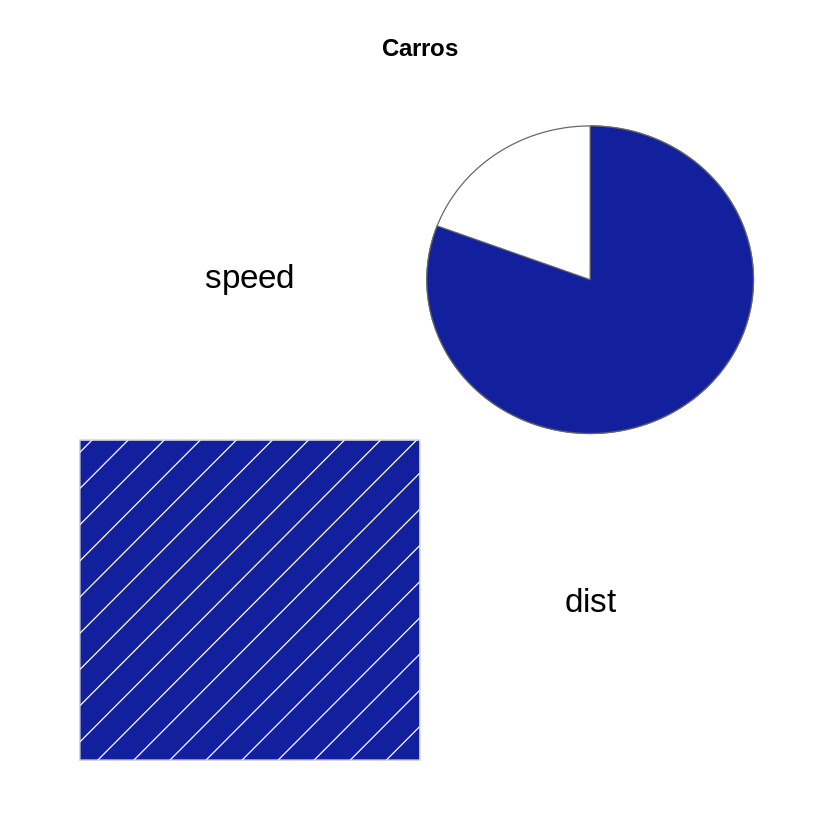

In [5]:
corrgram(cars, order = TRUE, lower.panel = panel.shade, upper.panel = panel.pie, text.panel = panel.txt, main="Carros")

# Modelo de Regressão Linear

=> queremos prever a velocidade que o carro estava baseado na distancia de parada

=> interceptação e inclinação o quanto a variavel dependente, aumenta com o aumento da variavel independente.

In [6]:
modelo_lm = lm(speed ~ dist, data = cars)
modelo_lm


Call:
lm(formula = speed ~ dist, data = cars)

Coefficients:
(Intercept)         dist  
     8.2839       0.1656  


Visualização da relação entre variaveis e linha de melhor ajuste.

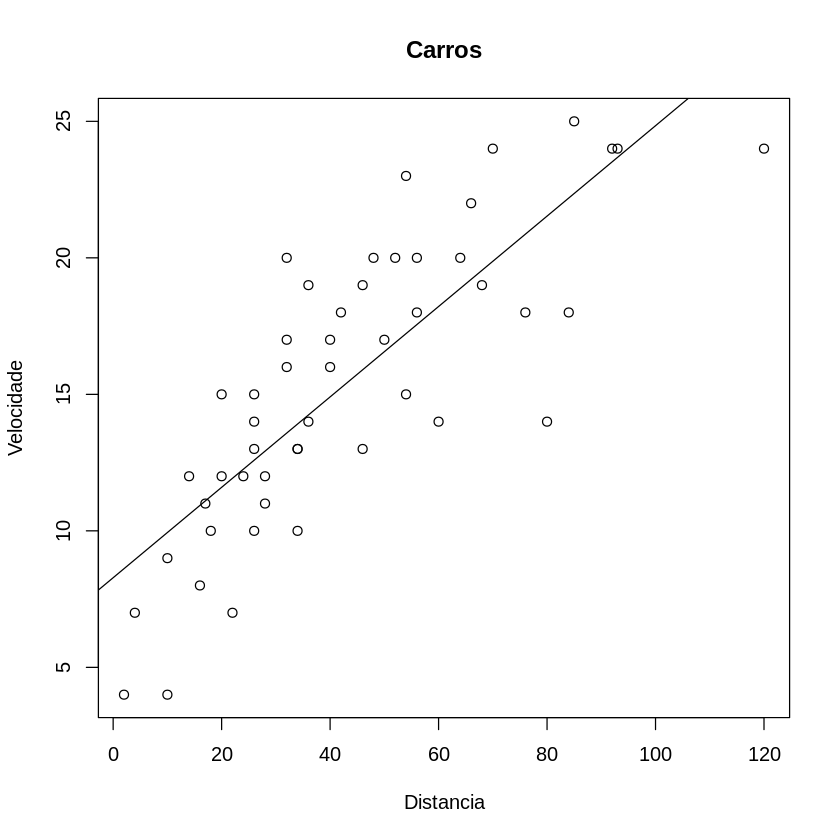

In [7]:
plot(speed ~ dist, data = cars, ylab = "Velocidade", xlab = "Distancia", main = "Carros")
abline(modelo_lm)

Fazendo uma previsao usando diretamente os coeficientes

Qual velocidade se levou 22 segundos para parar?

In [8]:
modelo_lm$coefficients

(Intercept)        dist 
  8.2839056   0.1655676

In [9]:
dist_22 <- modelo_lm$coefficients[1] + modelo_lm$coefficients[2] * 22
dist_22

(Intercept) 
   11.92639

In [16]:
# usando predict
prev_22 <- predict(modelo_lm, data.frame(dist = 56))
prev_22

1 
17.55569

# Analisando melhor o modelo

In [11]:
summary(modelo_lm)


Call:
lm(formula = speed ~ dist, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5293 -2.1550  0.3615  2.4377  6.4179 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.28391    0.87438   9.474 1.44e-12 ***
dist         0.16557    0.01749   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.156 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


In [12]:
# residuos
modelo_lm$residuals

1           2           3           4           5           6 
-4.61504079 -5.93958139 -1.94617594 -4.92639228 -2.93298684 -0.93958139 
          7           8           9          10          11          12 
-1.26412199 -2.58866258 -3.91320318 -0.09855441 -1.91979773  1.39814831 
         13          14          15          16          17          18 
 0.40474287 -0.25752743 -0.91979773  0.41133742 -0.91320318 -0.91320318 
         19          20          21          22          23          24 
-2.90001408  1.41133742 -0.24433833 -4.21796012 -7.52931161  3.40474287 
         25          26          27          28          29          30 
 2.41133742 -2.22455467  2.41793197  1.09339137  3.41793197  2.09339137 
         31          32          33          34          35          36 
 0.43771563  2.76225622  0.44431018 -2.86704131 -4.19158191  4.75566167 
         37          38          39          40          41          42 
 3.09998592 -0.54250072  6.41793197  3.76885078  3.10658048  2.44431018 
         43          44          45          46          47          48 
 1.11976958  2.78863443  5.77544533  4.12636413  0.48387749  0.31830992 
         49          50 
-4.15201460  2.64285051

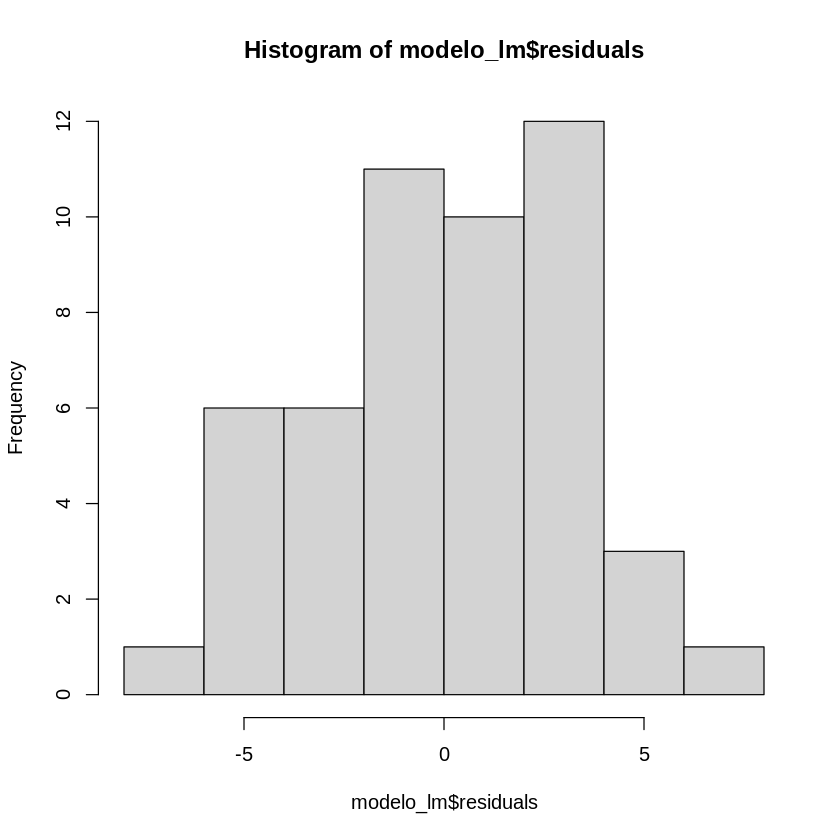

In [13]:
# hist dos residuos
hist(modelo_lm$residuals)

In [14]:
# fited.values
modelo_lm$fitted.values

1         2         3         4         5         6         7         8 
 8.615041  9.939581  8.946176 11.926392 10.932987  9.939581 11.264122 12.588663 
        9        10        11        12        13        14        15        16 
13.913203 11.098554 12.919798 10.601852 11.595257 12.257527 12.919798 12.588663 
       17        18        19        20        21        22        23        24 
13.913203 13.913203 15.900014 12.588663 14.244338 18.217960 21.529312 11.595257 
       25        26        27        28        29        30        31        32 
12.588663 17.224555 13.582068 14.906609 13.582068 14.906609 16.562284 15.237744 
       33        34        35        36        37        38        39        40 
17.555690 20.867041 22.191582 14.244338 15.900014 19.542501 13.582068 16.231149 
       41        42        43        44        45        46        47        48 
16.893420 17.555690 18.880230 19.211366 17.224555 19.873636 23.516123 23.681690 
       49        50 
28.152015 22.357149

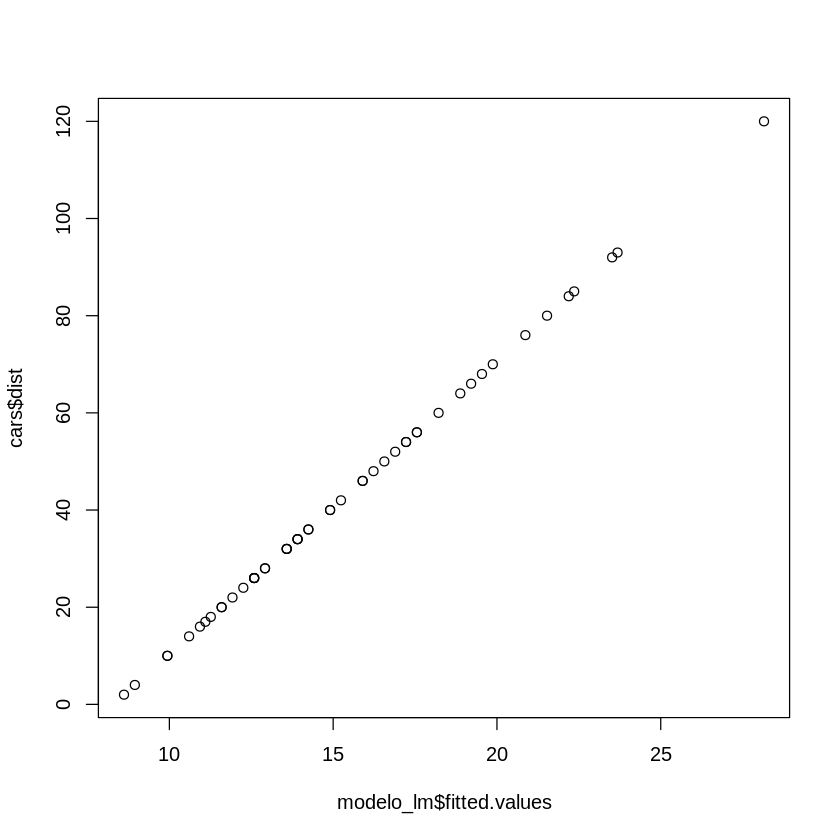

In [15]:
# plot fited.value
plot(modelo_lm$fitted.values, cars$dist)

Carros com consumo e outros aspectos

mpg: consumo, hp cavalos, cyl cilindros disp cilindradas

In [17]:
dim(mtcars)

[1] 32 11

In [18]:
# correlação
cor(mtcars[1:4])

,mpg,cyl,disp,hp
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684
cyl,-0.8521620,1.0000000,0.9020329,0.8324475
disp,-0.8475514,0.9020329,1.0000000,0.7909486
hp,-0.7761684,0.8324475,0.7909486,1.0000000


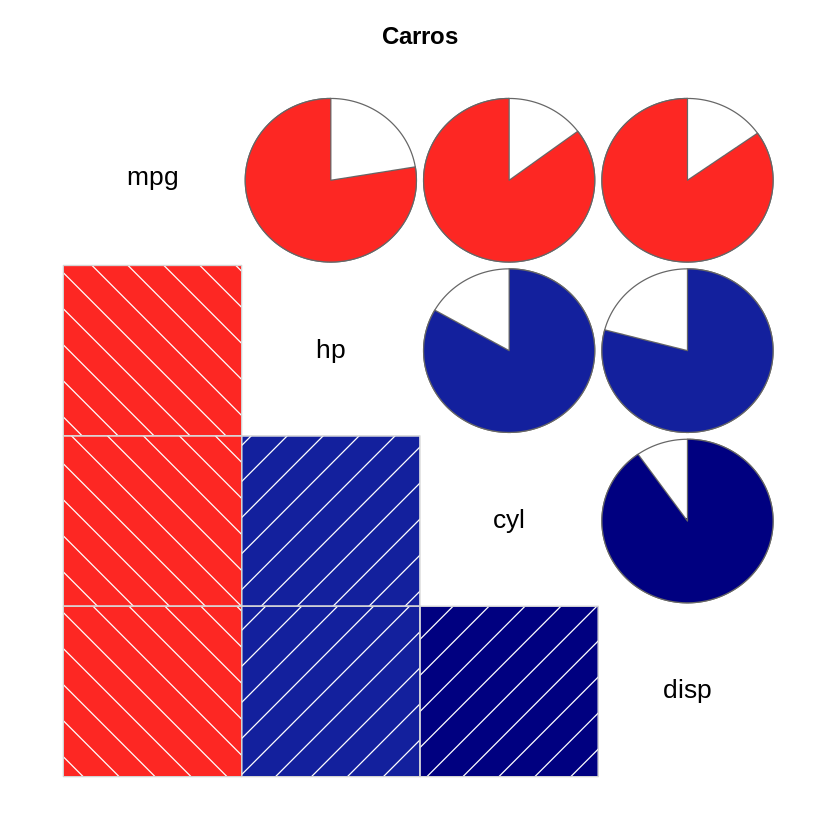

In [19]:
# corrgram
corrgram(mtcars[1:4], order = TRUE, lower.panel = panel.shade, upper.panel = panel.pie, text.panel = panel.txt, main="Carros")

Analisando cilindrdas vs consumo

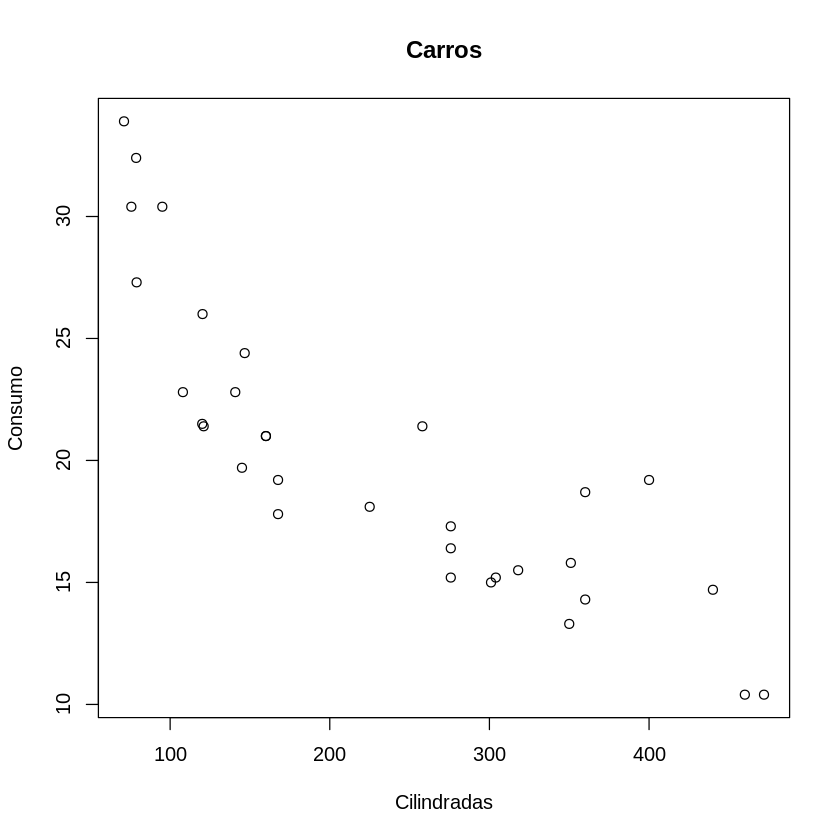

In [20]:
plot(mtcars$mpg ~ mtcars$disp, ylab = "Consumo", xlab = "Cilindradas", main = "Carros")

Modelo de regressão linear simples para prever o consumo

=> interceptação e inclinação

In [21]:
modelo_mtcars <- lm(mpg ~ disp, data = mtcars)
modelo_mtcars


Call:
lm(formula = mpg ~ disp, data = mtcars)

Coefficients:
(Intercept)         disp  
   29.59985     -0.04122  


Coeficiente de Determinação (71% da variavel dependente é explicada pela variavel explanatoria)

R² ajustado

In [22]:
summary(modelo_mtcars)$r.squared

[1] 0.7183433

In [23]:
# ajustado
summary(modelo_mtcars)$adj.r.squared

[1] 0.7089548

Grafico com linha de melhor ajuste do modelo

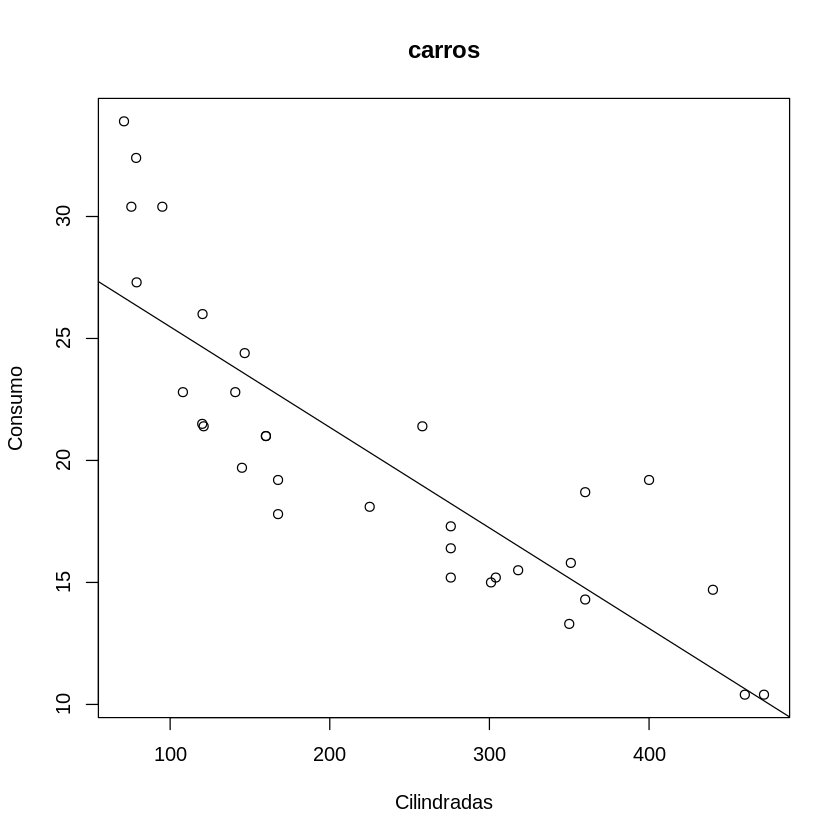

In [24]:
plot(mpg ~ disp, data = mtcars, ylab = "Consumo", xlab = "Cilindradas", main = "carros")
abline(modelo_mtcars)

prevendo o consumo com 200 cilindradas

In [25]:
previsao <- predict(modelo_mtcars, data.frame(disp = 200))
previsao

1 
21.35683

#<font color="green">Regressão Linear Multipla</font>


Adcionando mais duas variaveis independentes , hp e cilyndros

In [26]:
modelo_mult <- lm(mpg ~ disp + hp + cyl, data = mtcars)
modelo_mult


Call:
lm(formula = mpg ~ disp + hp + cyl, data = mtcars)

Coefficients:
(Intercept)         disp           hp          cyl  
   34.18492     -0.01884     -0.01468     -1.22742  


R² ajustado

In [31]:
summary(modelo_mult)$r.squared


[1] 0.7678877

In [32]:
summary(modelo_mult)$adj.r.squared

[1] 0.7430186

R² ajustado => coeficiente de determinação (74% da variavel dependente é explicada pelas variaveis explanatorias no conjunto de dados)

Gerando uma previsão com 200 cilindradas, 100 hp e 4 cilindros.

In [33]:
previsao_mult <- predict(modelo_mult, data.frame(disp = 200, hp = 100, cyl = 4))
previsao_mult

1 
24.03969

Atividade:

Prever custo inicial de uma franquia:

In [41]:
dados <- read.csv("dados/slr12.csv", sep = ";")

In [42]:
dados

FrqAnual,CusInic
<int>,<int>
1000,1050
1125,1150
1087,1213
1070,1275
1100,1300
1150,1300
1250,1400
1150,1400
1100,1250


In [43]:
investimento_inicial <- lm(CusInic ~ FrqAnual, data = dados)

In [44]:
investimento_inicial


Call:
lm(formula = CusInic ~ FrqAnual, data = dados)

Coefficients:
(Intercept)     FrqAnual  
   867.6042       0.3732  


In [45]:
# R² 
summary(investimento_inicial)$r.squared

[1] 0.2275359

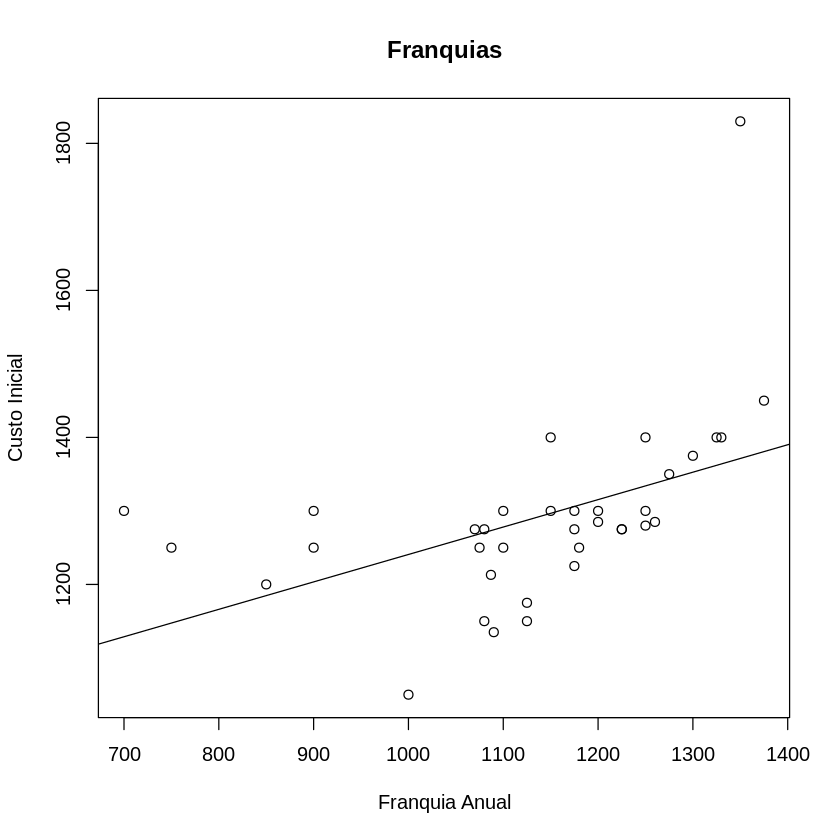

In [46]:
plot(CusInic  ~ FrqAnual, data = dados, ylab = "Custo Inicial", xlab = "Franquia Anual", main = "Franquias")
abline(investimento_inicial)

In [47]:
previsao_invest <- predict(investimento_inicial, data.frame(FrqAnual = 2800))
previsao_invest

1 
1912.446

#<font color="DarkGoldenrod">Regressão Logística</font>

In [2]:
# dados
eleicao <- read.csv("dados/Eleicao.csv", sep = ";", header = T)

In [3]:
eleicao

CANDIDATO,SITUACAO,DESPESAS
<chr>,<int>,<int>
George Turner,0,10
Victor Johnson,0,100
Jerry Perry,1,1600
Shirley Cook,1,1500
Carolyn Bailey,1,3300
Susan Sanders,0,200
Anthony Harris,1,1800
Philip Richardson,1,1700
Eugene Phillips,0,300


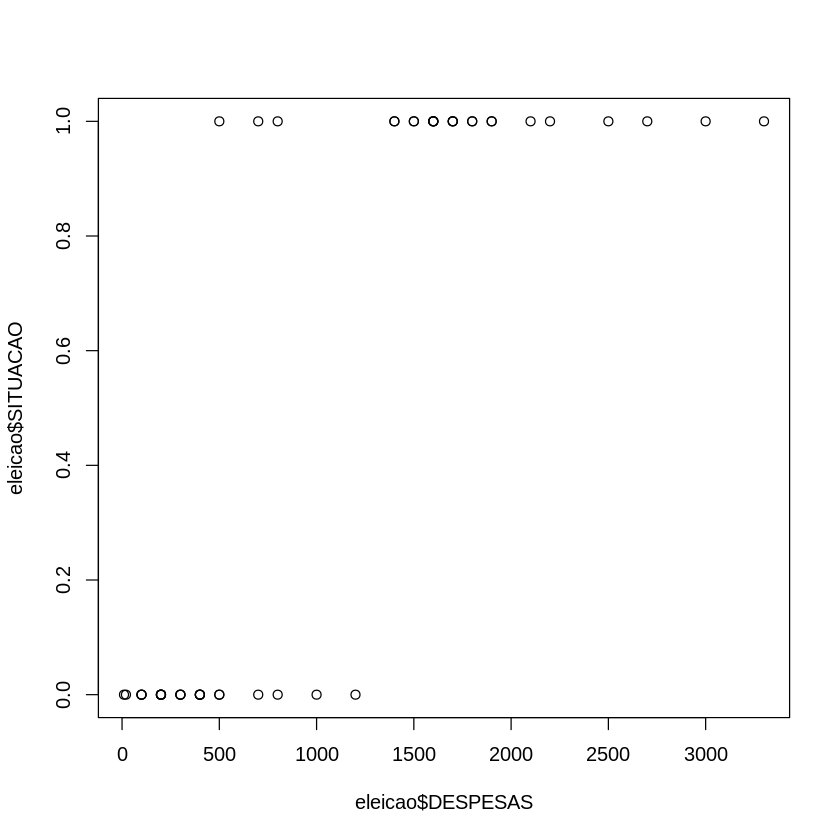

In [4]:
# grafico e visualização
plot(eleicao$DESPESAS, eleicao$SITUACAO)

In [5]:
summary(eleicao)

  CANDIDATO            SITUACAO         DESPESAS   
 Length:47          Min.   :0.0000   Min.   :  10  
 Class :character   1st Qu.:0.0000   1st Qu.: 300  
 Mode  :character   Median :1.0000   Median : 800  
                    Mean   :0.5106   Mean   :1086  
                    3rd Qu.:1.0000   3rd Qu.:1700  
                    Max.   :1.0000   Max.   :3300  

Correlação

In [6]:
cor(eleicao$DESPESAS, eleicao$SITUACAO)

[1] 0.8121872

Modelo de Regressão Logística

In [7]:
modelo <- glm(SITUACAO ~ DESPESAS, data = eleicao, family = "binomial")

In [8]:
summary(modelo)


Call:
glm(formula = SITUACAO ~ DESPESAS, family = "binomial", data = eleicao)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.79020  -0.29574   0.00379   0.20326   2.10968  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.602880   1.315934  -3.498 0.000469 ***
DESPESAS     0.004984   0.001404   3.550 0.000385 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 18.540  on 45  degrees of freedom
AIC: 22.54

Number of Fisher Scoring iterations: 7


Modelo comparado aos dados

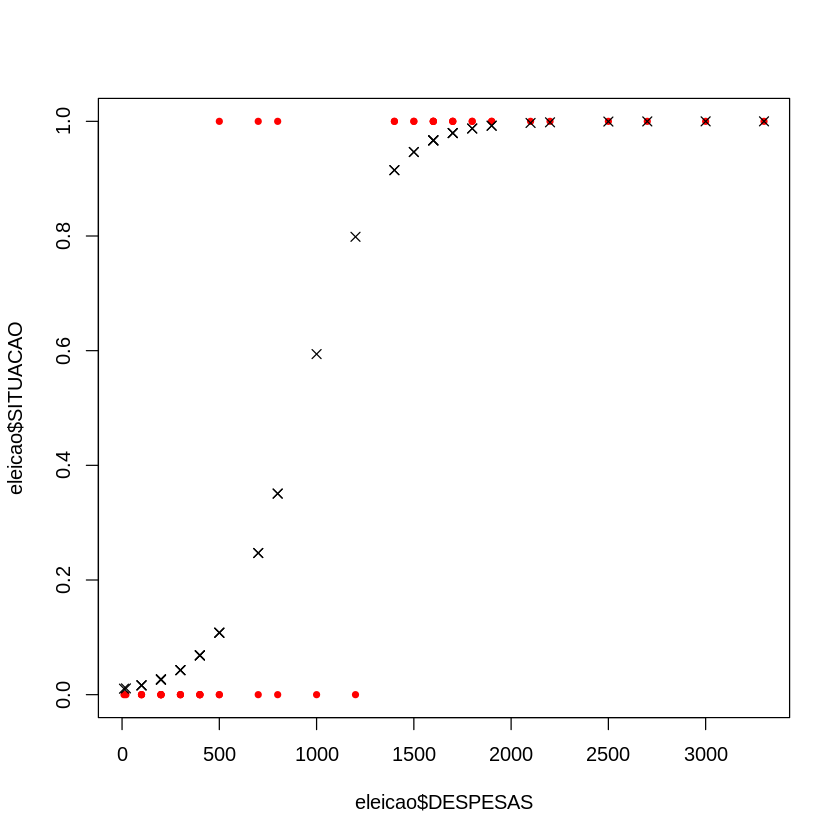

In [9]:
plot(eleicao$DESPESAS, eleicao$SITUACAO, col = 'red', pch = 20)
points(eleicao$DESPESAS, modelo$fitted, pch =4)

Testar o modelo com os proprios candidatos

In [11]:
prever <- predict(modelo, newdata = eleicao, type = "response")
prever = prever >= 0.5
prever

1     2     3     4     5     6     7     8     9    10    11    12    13 
FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE 
   40    41    42    43    44    45    46    47 
 TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE

Avaliar a performance

In [14]:
confusao <- table(prever, eleicao$SITUACAO)
tax_acerto <- (confusao[1] + confusao[4]) / sum(confusao)
tax_acerto

[1] 0.893617

In [19]:
confusao

       
prever   0  1
  FALSE 21  3
  TRUE   2 21

Prevendo a Eleição para novos Candidatos

In [16]:
preleicao <- read.csv("dados/NovosCandidatos.csv", sep = ";", header = T)
preleicao

CANDIDATO,DESPESAS
<chr>,<int>
A,0
B,10
C,200
D,500
E,900
F,1500
G,3000


Previsão

In [18]:
preleicao$RESUL <- predict(modelo, newdata = preleicao, type = "response")
preleicao$RESUL >= 0.5

[1] FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE